In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
import fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from Secrest_dipole import SecrestDipole
from multipoles import construct_templates, compute_Cells_from_map, compute_Cells
import dipole
from jackknife import get_longitude_subsamples, compute_jackknife_uncertainty

In [3]:
# CMB dipole
_, cmb_dipdir = dipole.cmb_dipole()
cmb_dipamp = 0.005  # expected for quaia

In [4]:
# from Giulio:

# note the args.qsodipole strcuture has 3 elements (l,b,v),
#  where first 2 are galactic coordinates in deg and v is the expected amplitude that you fitted
#  from the data or can take from CMB only dipole etc)

# print("Add QSO dipole (l,b,beta)=",args.qsodipole,"to mocks")

# dipole peak in galactic coordinates in degrees (**note Giulio had a bug with rads), plus the expected amplitude
aberration_qso = (cmb_dipdir.galactic.l.deg, cmb_dipdir.galactic.b.deg, cmb_dipamp)
l_qso, b_qso, v_qso = aberration_qso

# convert (l,b) to a 3D vector on the sky
vec_qso  = hp.ang2vec(l_qso, b_qso, lonlat=True)

# vector for every healpixel on the sky
nside = 64
vecs = hp.pix2vec(nside, np.arange(hp.nside2npix(nside)))

# cosine between every healpixel and the dipole peak
costheta = np.dot(np.array(vecs).T, vec_qso)

# the expected dipole
dipole_qso = v_qso * costheta
# the expected quadrupole
quadrupole_qso = v_qso**2 * 3 * (3 * costheta**2 - 1) / 2

# Cells of the combined map
max_ell = 10
Cells_qso = hp.anafast(dipole_qso + quadrupole_qso, lmax=max_ell)

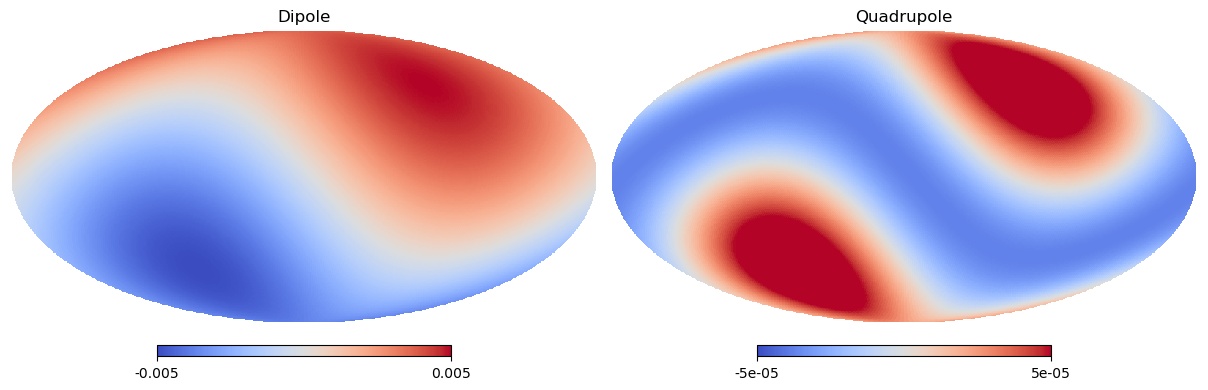

In [5]:
# plot the dipole, quadrupole, and combined
fig = plt.figure(figsize=(12,4))
kwargs = dict(cmap='coolwarm', fig=fig)
hp.mollview(dipole_qso, title='Dipole', min=-v_qso, max=v_qso, sub=(1,2,1), **kwargs)
hp.mollview(quadrupole_qso, title='Quadrupole', min=-0.01*v_qso, max=0.01*v_qso, sub=(1,2,2), **kwargs)

Text(0.5, 1.0, 'Quaia expected dipole + quadrupole (from hp.anafast())')

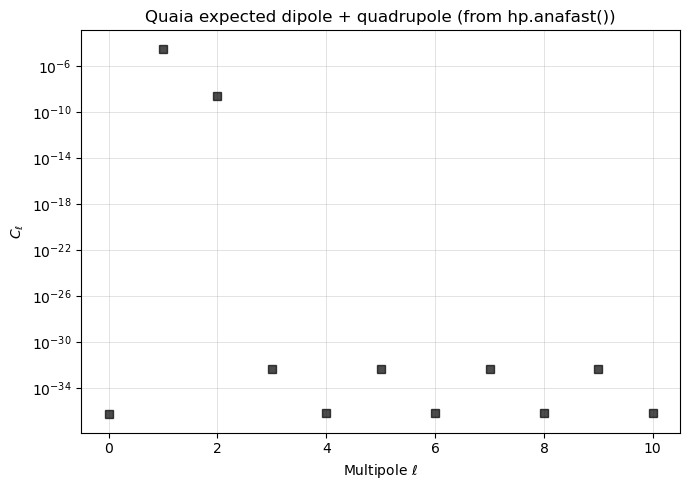

In [6]:
# plot the Cells
ells = np.arange(max_ell+1)
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)
ax.plot(ells, Cells_qso, 'ks', ls='None', alpha=0.7)
ax.grid(lw=0.5, alpha=0.5)
ax.semilogy()
ax.set_xlabel(r'Multipole $\ell$')
ax.set_ylabel(r'$C_\ell$')
ax.set_title(r'Quaia expected dipole + quadrupole (from hp.anafast())')

In [7]:
Cells_qso

array([5.51260514e-37, 3.49065850e-05, 2.82743339e-09, 5.11615663e-33,
       7.68287916e-37, 5.14742242e-33, 7.27298337e-37, 4.78737170e-33,
       6.95594069e-37, 4.81305483e-33, 7.14126500e-37])